In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

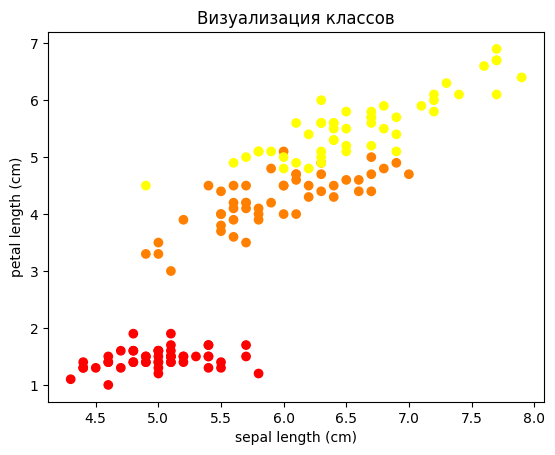

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

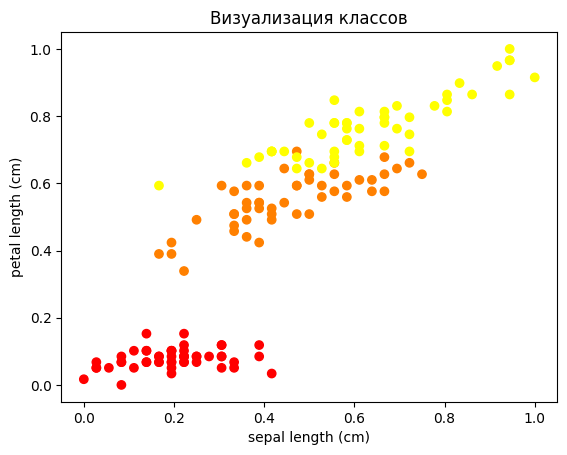

In [ ]:
plt.scatter(X_scaled[:,0:1], X_scaled[:,1:2], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


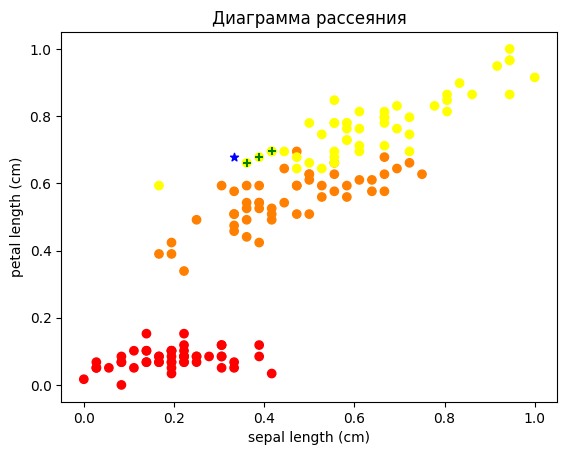

In [ ]:
iris = load_iris()
features = iris.data

X = data.iloc[:, [0, 2]]
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)

distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

# 1 Постройте последний график методических указаний в исходном пространстве признаков.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


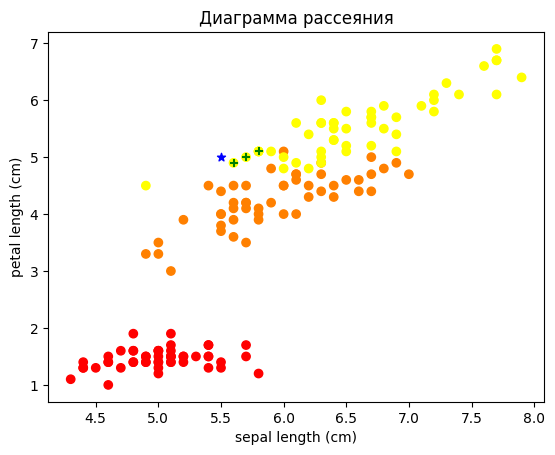

In [ ]:
iris = load_iris()
features = iris.data

X = data.iloc[:, [0, 2]]
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)

distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

reverse = scaler.inverse_transform(X_scaled[indices[0]])
for i in range(3):
    plt.scatter(reverse[i][0], reverse[i][1],  marker='+', color='g')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

# 2 Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


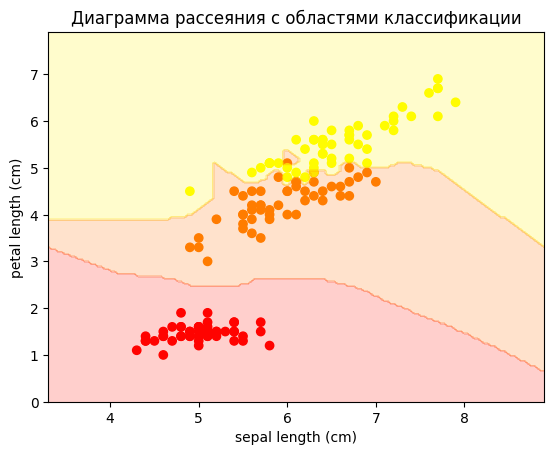

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_scaled, y)

y_pred = knn1.predict(X_scaled)

X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

XX_scaled = scaler.transform(XX)
Z = knn1.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

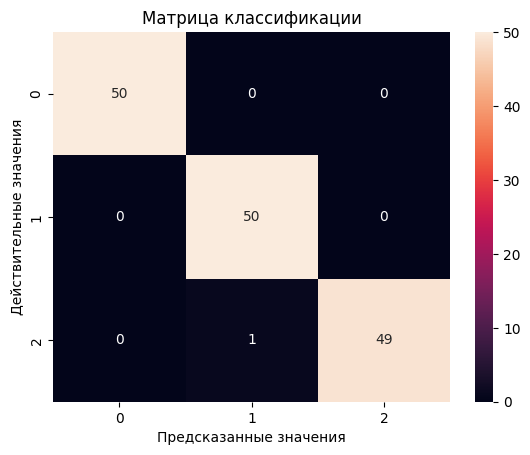

In [ ]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

# 3 Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


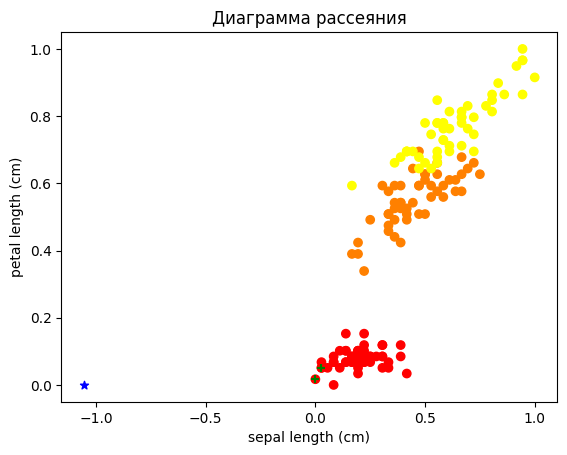

In [ ]:
observation_new = [[0.5, 1]]
observation_new_scaled = scaler.transform(observation_new)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


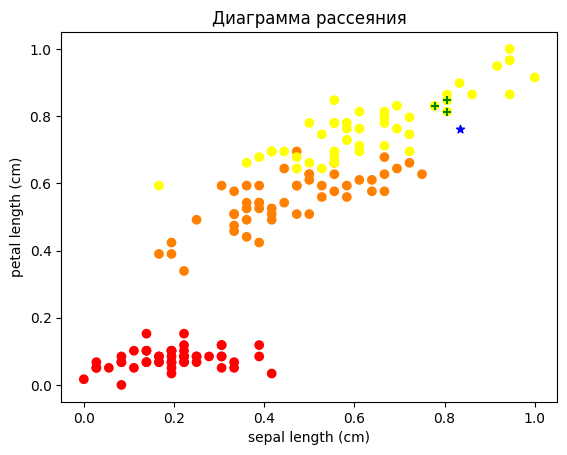

In [ ]:
observation_new = [[7.3, 5.5]]
observation_new_scaled = scaler.transform(observation_new)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

## 4 Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.

In [ ]:
def draw_neighb(point, knn):
  observation_new_scaled = scaler.transform(point)

  plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

  plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

  distances, indices = knn.kneighbors(observation_new_scaled)

  plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
  plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
  plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

  plt.title("Диаграмма рассеяния")
  plt.xlabel('sepal length (cm)')
  plt.ylabel('petal length (cm)')
  plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


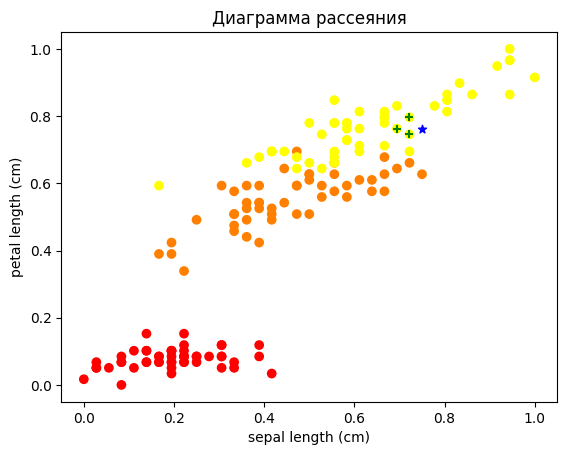

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


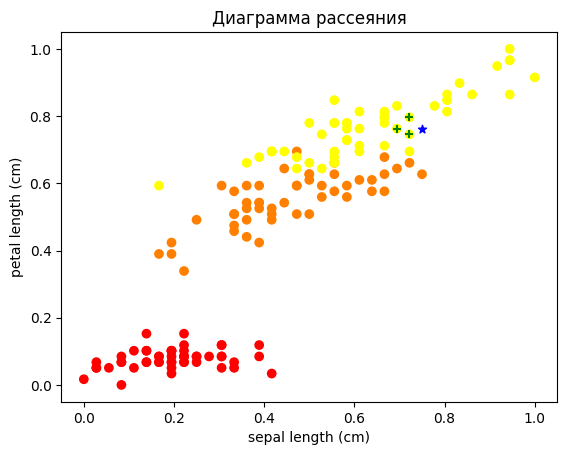

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


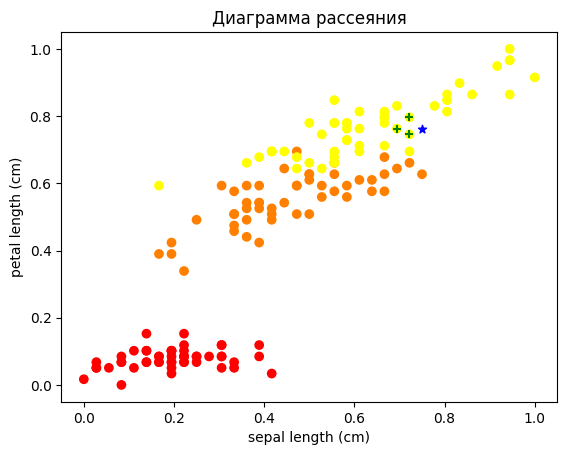

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


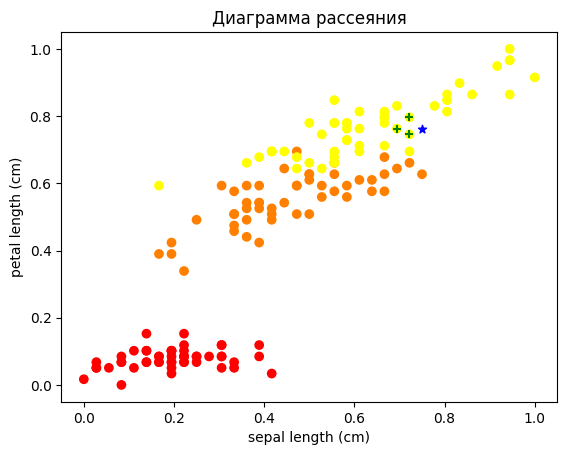

In [ ]:
iris = load_iris()
features = iris.data

X = data.iloc[:, [0, 2]]
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

metrics = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
models = [KNeighborsClassifier(n_neighbors=3, metric=metric) for metric in metrics]

point = [[7, 5.5]]

for model in models:
    model.fit(X_scaled, y)
    draw_neighb(point, model)





# 5 Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
iris = load_iris()
features = iris.data
X = data
y = iris.target

In [ ]:
def learn_knn(x, y, k):
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_scaled, y)

  y_pred = knn.predict(X_scaled)

  print(classification_report(y_pred, y))

k_ = [4, 15, 100]

for i in k_:
  print("-"*22, 'K = ', i, '-'*22)
  learn_knn(X, y, i)


---------------------- K =  4 ----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.92      0.94        52
           2       0.92      0.96      0.94        48

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

---------------------- K =  15 ----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.92      0.95        53
           2       0.92      0.98      0.95        47

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

---------------------- K =  100 ----------------------
              precision    recall  f1-score   support

           0       1.

# 6 Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.

In [ ]:

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

print(classification_report(y_pred, y))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



# 7 Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод.

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
def test_accuracy(x, y, k):
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_scaled, y)

  y_pred = knn.predict(X_scaled)
  return accuracy_score(y, y_pred)


Text(0, 0.5, 'accuracy')

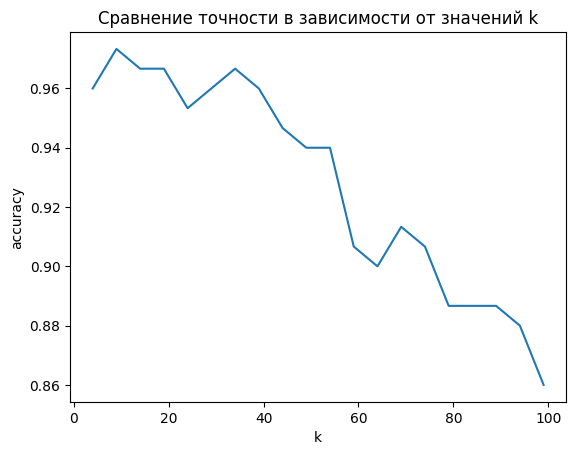

In [ ]:
iris = load_iris()
features = iris.data
x = data
y = iris.target

accur = list(map(lambda k: test_accuracy(x, y, k), np.arange(4, 100, 5)))
plt.plot(np.arange(4, 100, 5), accur)

plt.title("Сравнение точности в зависимости от значений k")
plt.xlabel('k')
plt.ylabel('accuracy')


# 8 Выберите датасет и постройте регрессию при помощи метода ближайших соседей.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()

x = housing.data
y = housing.target

neigh = KNeighborsRegressor(n_neighbors=15)
neigh.fit(x, y)

mean_squared_error(y, neigh.predict(x))

0.9588551674010954